In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
no_mod_results = pd.read_csv('experiment_results.csv')
no_mod_results = no_mod_results.rename(columns={'percentage':'pct'})
no_mod_results.head()

,dataset,modification,pct,method,metric,value
0,Dancer 01,random asc,0.0,Louvain-igraph,P,9.000000
1,Dancer 01,random asc,0.0,Louvain-igraph,P*/P,0.666667
2,Dancer 01,random asc,0.0,Louvain-igraph,Modularity,0.649290
3,Dancer 01,random asc,0.0,Louvain-igraph,NMI,0.775724
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000


In [7]:
no_mod_results['modification'].unique()

array(['random asc', 'betweenness asc', 'betweenness desc'], dtype=object)

In [27]:
# Load results from adding edges
mod_results_folder = 'D:/Pablo/clases/UJM/2. Semester, 2021/Mining Uncertain Social Networks/Experiments/datasets/dancer_01/'

add_edges_results = pd.read_csv(mod_results_folder+'add_edges_communities.csv')
add_weighted_results = pd.read_csv(mod_results_folder+'add_weighted_communities.csv')
add_all_w_results = pd.read_csv(mod_results_folder+'add_all_weighted_communities.csv')

threshold_scores = pd.read_csv(mod_results_folder+'thresholds_scores.csv')

# Copy the base case for all for all of the types of modifications
for mod in ['bet_asc', 'bet_desc', 'random']:
    base = add_edges_results[add_edges_results['modification']=='base'].copy()
    base['modification'] = mod
    add_edges_results = pd.concat([add_edges_results ,base], ignore_index=True)
    
    base = add_weighted_results[add_weighted_results['modification']=='base'].copy()
    base['modification'] = mod
    add_weighted_results = pd.concat([add_weighted_results ,base], ignore_index=True)
    
    base = add_all_w_results[add_all_w_results['modification']=='base'].copy()
    base['modification'] = mod
    add_all_w_results = pd.concat([add_all_w_results ,base], ignore_index=True)
    
mod_mapping = {'bet_asc':'betweenness asc', 'bet_desc':'betweenness desc', 'random':'random asc', 'base':'base'}

add_edges_results['modification'] = add_edges_results['modification'].apply(lambda x: mod_mapping[x])
add_weighted_results['modification'] = add_weighted_results['modification'].apply(lambda x: mod_mapping[x])
add_all_w_results['modification'] = add_all_w_results['modification'].apply(lambda x: mod_mapping[x])

In [9]:
add_edges_results.head()

,dataset,file_name,method,metric,value,pct,modification
0,dancer_01,base.txt,Louvain-igraph,P,8.000000,0.0,base
1,dancer_01,base.txt,Louvain-igraph,P*/P,0.750000,0.0,base
2,dancer_01,base.txt,Louvain-igraph,Modularity,0.649312,0.0,base
3,dancer_01,base.txt,Louvain-igraph,NMI,0.771613,0.0,base
4,dancer_01,base.txt,Fastgreedy,P,8.000000,0.0,base


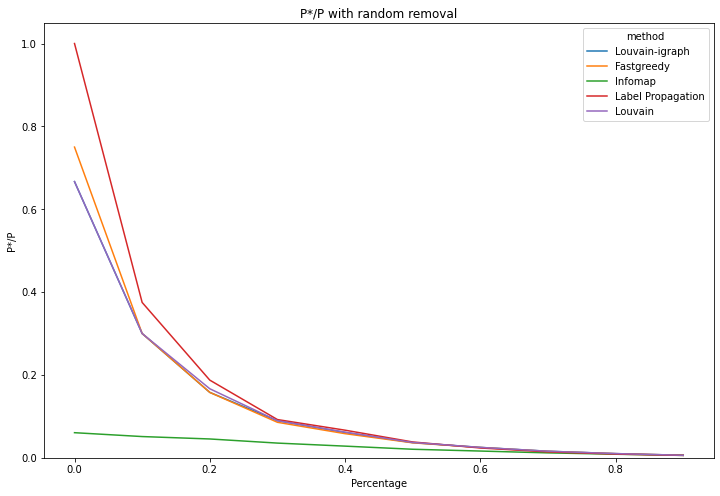

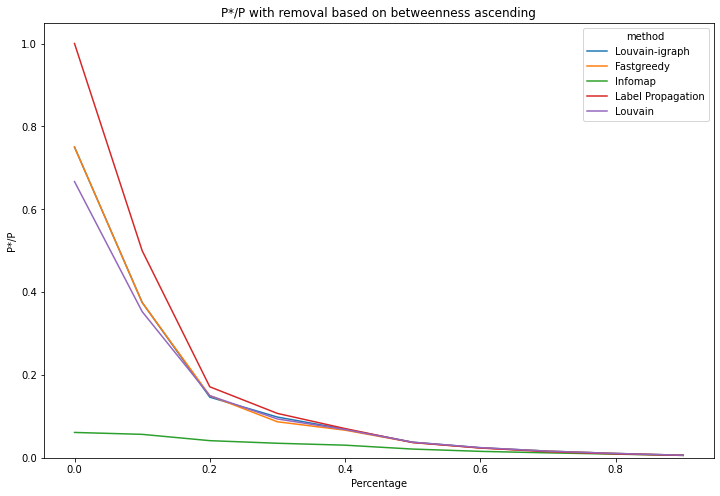

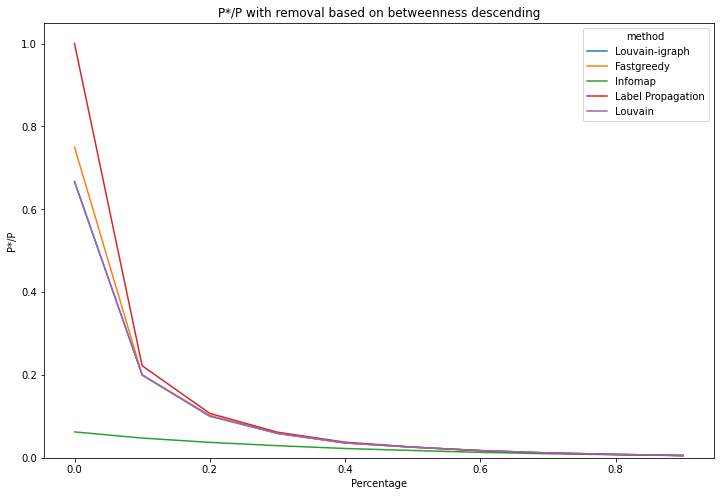

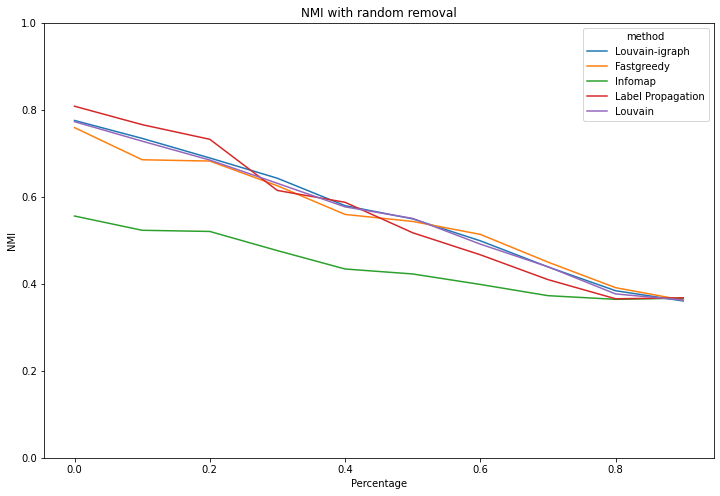

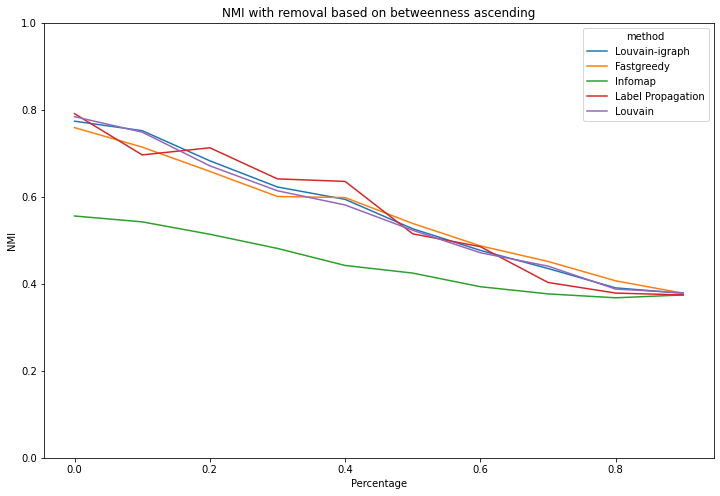

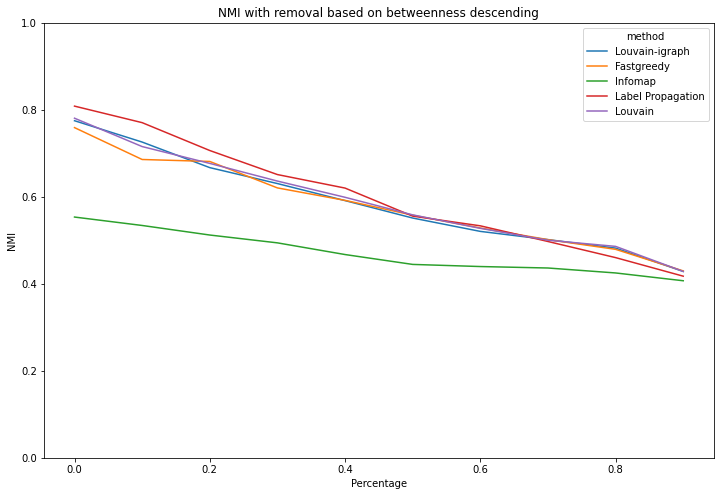

In [10]:
# This for cycle is for visualization only

for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in no_mod_results['modification'].unique():
#        for dataset in metrics['dataset'].unique():
        for dataset in ['Dancer 01']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = no_mod_results[(no_mod_results['metric'] == metric) &
                                   (no_mod_results['modification'] == modification) &
                                   (no_mod_results['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')
                
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

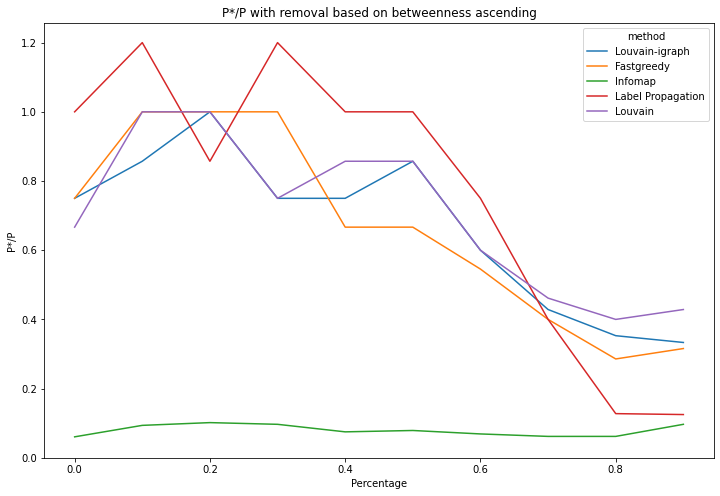

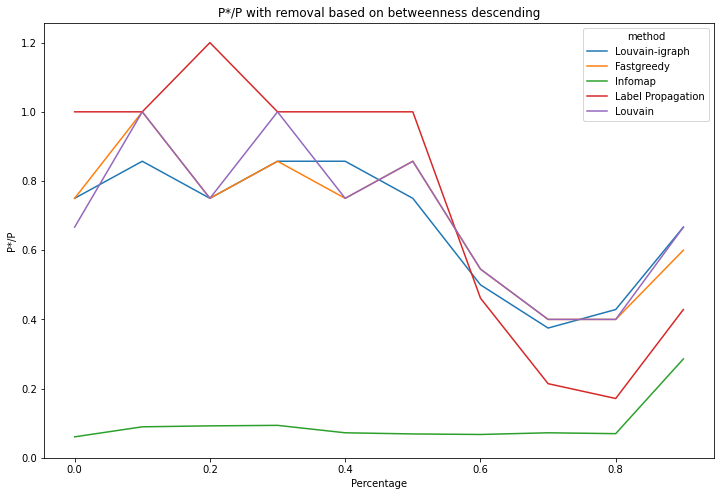

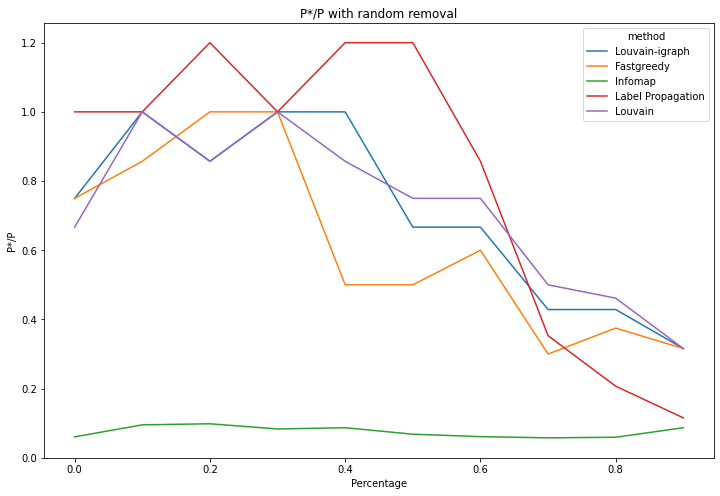

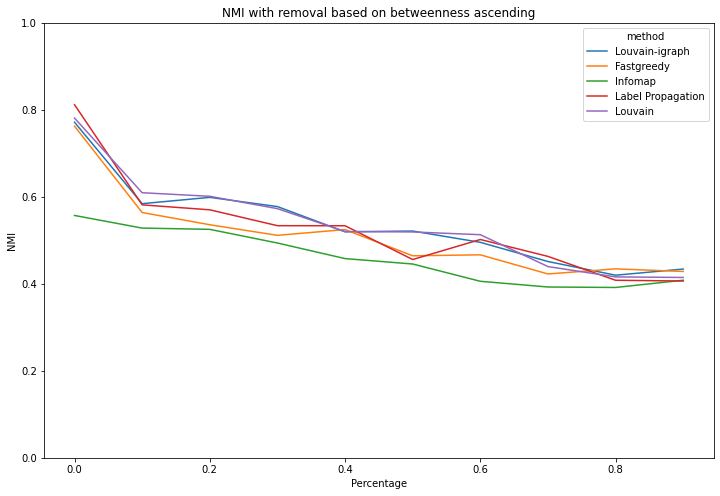

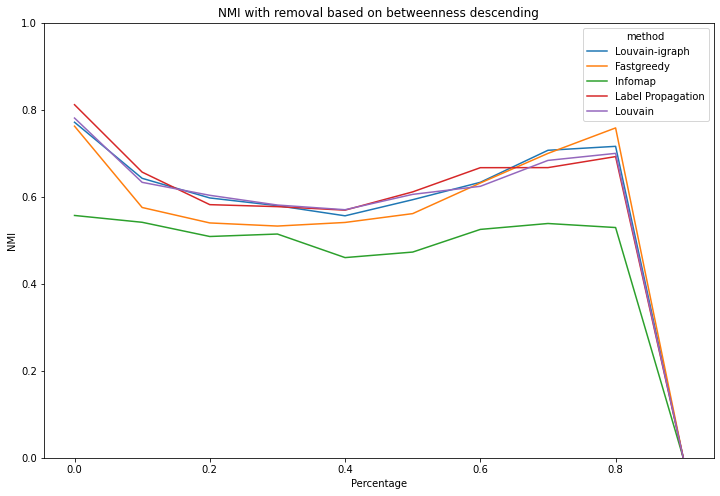

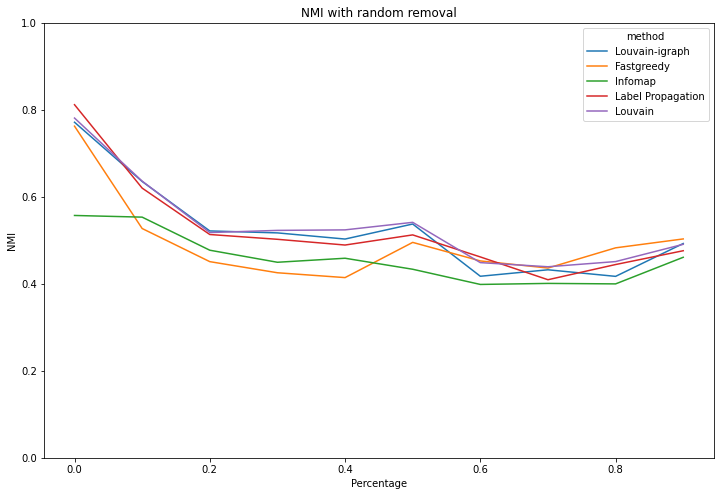

In [11]:
# This for cycle is for visualization only

results = add_edges_results
#results = add_weighted_results
#results = add_all_w_results


for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in ['betweenness asc', 'betweenness desc', 'random asc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = results[(results['metric'] == metric) &
                            (results['modification'] == modification) &
                            (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')
                
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

In [23]:
no_mod_results.head()

,dataset,modification,percentage,method,metric,value
0,Dancer 01,random asc,0.0,Louvain-igraph,P,9.000000
1,Dancer 01,random asc,0.0,Louvain-igraph,P*/P,0.666667
2,Dancer 01,random asc,0.0,Louvain-igraph,Modularity,0.649290
3,Dancer 01,random asc,0.0,Louvain-igraph,NMI,0.775724
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000


In [24]:
add_edges_results.head()

,dataset,file_name,method,metric,value,pct,modification
0,dancer_01,base.txt,Louvain-igraph,P,6.000000,0.0,base
1,dancer_01,base.txt,Louvain-igraph,P*/P,1.000000,0.0,base
2,dancer_01,base.txt,Louvain-igraph,Modularity,0.555529,0.0,base
3,dancer_01,base.txt,Louvain-igraph,NMI,0.594114,0.0,base
4,dancer_01,base.txt,Fastgreedy,P,7.000000,0.0,base


In [31]:
results = add_edges_results
# Filter: dataset, metric
# Join: method, modification, pct
comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])
comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']

comparison

,dataset,modification,pct,method,metric,value_no_change,value_change,pct_change
0,dancer_01,random asc,0.0,Louvain-igraph,P*/P,0.666667,1.000000,0.500000
1,dancer_01,random asc,0.0,Louvain-igraph,NMI,0.775724,0.594114,-0.234116
2,dancer_01,random asc,0.0,Fastgreedy,P*/P,0.750000,0.857143,0.142857
3,dancer_01,random asc,0.0,Fastgreedy,NMI,0.759245,0.503781,-0.336472
4,dancer_01,random asc,0.0,Infomap,P*/P,0.060606,0.105263,0.736842
...,...,...,...,...,...,...,...,...
295,dancer_01,betweenness desc,0.9,Infomap,NMI,0.407105,0.000000,-1.000000
296,dancer_01,betweenness desc,0.9,Label Propagation,P*/P,0.005372,2.000000,371.333333
297,dancer_01,betweenness desc,0.9,Label Propagation,NMI,0.417631,0.000000,-1.000000
298,dancer_01,betweenness desc,0.9,Louvain,P*/P,0.005505,0.545455,98.090909


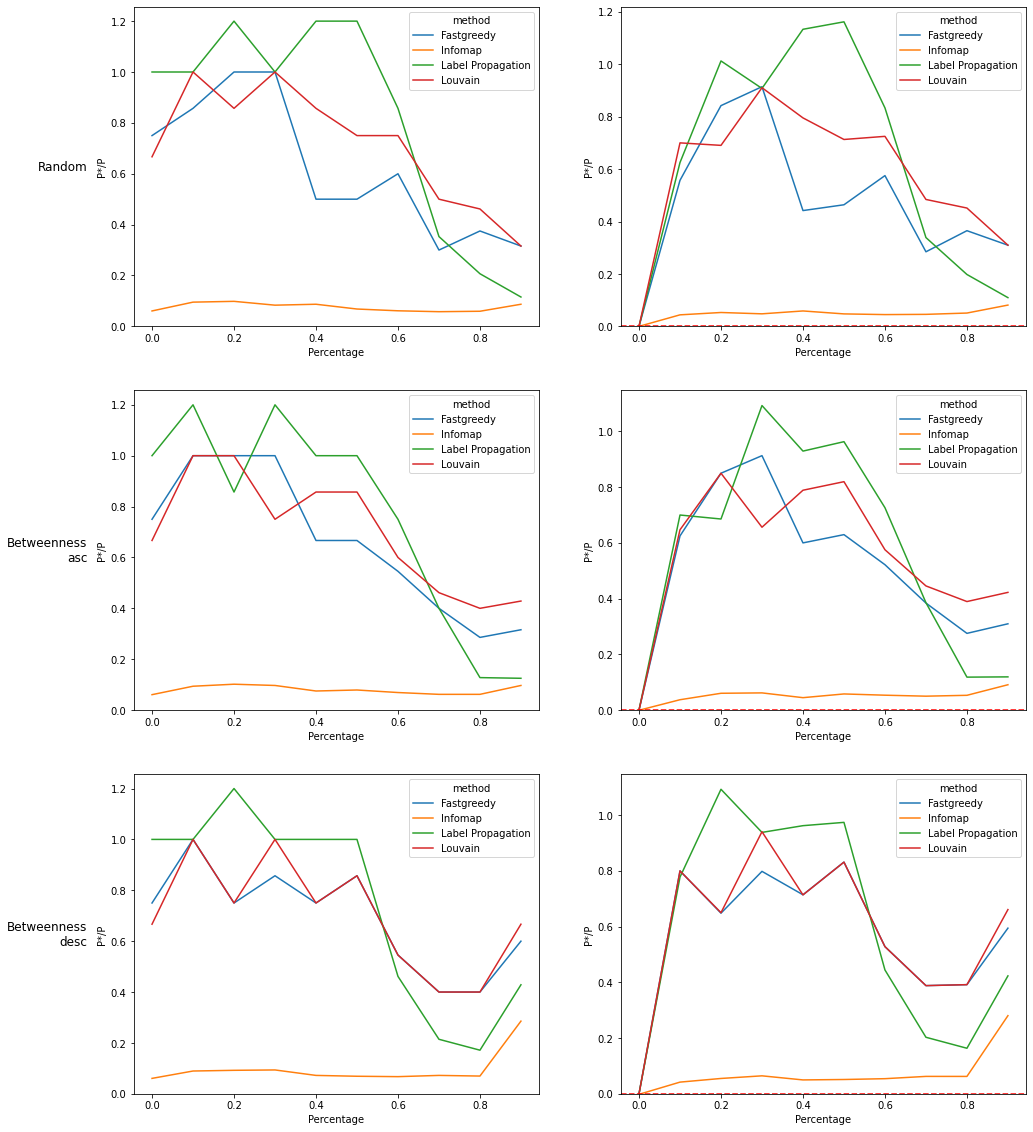

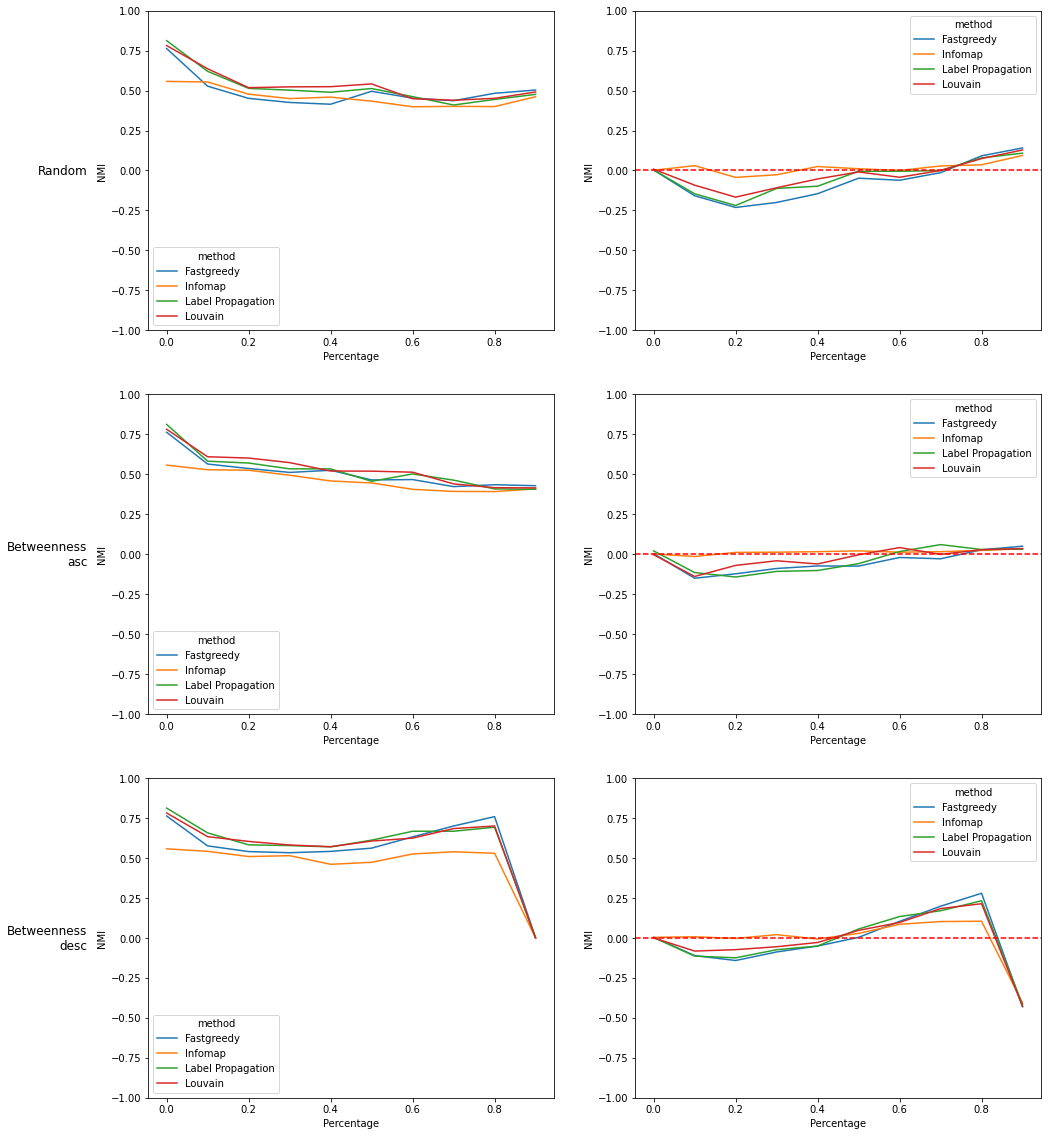

In [60]:
# This for cycle is for visualization only

results = add_edges_results
#results = add_weighted_results
#results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) #/ comparison['value_no_change']
comparison = comparison[comparison['method'] != 'Louvain-igraph']




for metric in ['P*/P','NMI']:
    fig, ax = plt.subplots(ncols=2, nrows=3,figsize=(16,20))
    i = 0
    for modification in ['random asc', 'betweenness asc','betweenness desc']:
        for dataset in ['dancer_01']:
            c_ax = ax[i]
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value_change', hue='method',ax=c_ax[0])
            sns.lineplot(data=data, x='pct', y='pct_change', hue='method',ax=c_ax[1])
            
            for j in range(0,2):
                c_ax[j].set_ylabel(metric)
                c_ax[j].set_xlabel('Percentage')

                if metric == 'NMI':
                    c_ax[j].set_ybound(upper=1, lower=-1)
                else:
                    c_ax[j].set_ybound(lower=0)

            if modification == 'betweenness asc':
                y_label = 'Betweenness\nasc'
            elif modification == 'betweenness desc':
                y_label = 'Betweenness\ndesc'
            else:
                y_label = 'Random'
            c_ax[0].annotate(y_label, xy=(0, 0.5), xytext=(-c_ax[0].yaxis.labelpad - 5, 0),
            xycoords=c_ax[0].yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center')
                            
            c_ax[1].axhline(y=0.0, color='r', linestyle='--')
                
        i += 1
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

In [61]:
# This for cycle is for generating the latex tables

#results = add_edges_results
#results = add_weighted_results
results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change'])
comparison = comparison[comparison['method'] != 'Louvain-igraph']



for metric in ['NMI']:
#for metric in metrics['metric'].unique():
    for modification in ['betweenness asc','betweenness desc','random asc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            data = data[['pct','method','pct_change']]
            data = data.pivot(index="pct", columns="method", values="pct_change").reset_index()
            print('------------------------------------------------------------')
            print(metric,modification)
            #print(data.to_latex(index=False, float_format="{0:.0%}".format))
            print(data)
            print('------------------------------------------------------------')

------------------------------------------------------------
NMI betweenness asc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003396  0.001628           0.023953  0.008328
1       0.1   -0.150367 -0.015068          -0.114999 -0.151551
2       0.2   -0.122614  0.009038          -0.123944 -0.067720
3       0.3   -0.089304  0.006400          -0.079779 -0.031630
4       0.4   -0.073554  0.023176          -0.153192 -0.052971
5       0.5   -0.074307  0.021329          -0.008677 -0.006459
6       0.6   -0.020539  0.025142          -0.022799  0.017351
7       0.7   -0.028814  0.007421          -0.000129 -0.029049
8       0.8    0.027530  0.032493           0.018027  0.033748
9       0.9    0.050063  0.034125           0.042485  0.020678
------------------------------------------------------------
------------------------------------------------------------
NMI betweenness desc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003

In [26]:
# This for cycle is for generating the latex tables

#results = add_edges_results
#results = add_weighted_results
results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change'])
comparison = comparison[comparison['method'] != 'Louvain-igraph']



for metric in ['NMI']:
#for metric in metrics['metric'].unique():
    for modification in ['betweenness asc','betweenness desc','random asc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            data = data[['pct','method','pct_change']]
            data = data.pivot(index="pct", columns="method", values="pct_change").reset_index()
            print('------------------------------------------------------------')
            print(metric,modification)
            #print(data.to_latex(index=False, float_format="{0:.0%}".format))
            print(data)
            print('------------------------------------------------------------')

------------------------------------------------------------
NMI betweenness asc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003396  0.001628           0.023953  0.008328
1       0.1   -0.150367 -0.015068          -0.114999 -0.151551
2       0.2   -0.122614  0.009038          -0.123944 -0.067720
3       0.3   -0.089304  0.006400          -0.079779 -0.031630
4       0.4   -0.073554  0.023176          -0.153192 -0.052971
5       0.5   -0.074307  0.021329          -0.008677 -0.006459
6       0.6   -0.020539  0.025142          -0.022799  0.017351
7       0.7   -0.028814  0.007421          -0.000129 -0.029049
8       0.8    0.027530  0.032493           0.018027  0.033748
9       0.9    0.050063  0.034125           0.042485  0.020678
------------------------------------------------------------
------------------------------------------------------------
NMI betweenness desc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003

In [48]:
thresholds = threshold_scores.copy()

thresholds['modification'] = thresholds['file_name'].apply(lambda x: 'base' if x.startswith('base') else
                                                          'Betweenness ascending' if x.startswith('bet_asc') else
                                                          'Betweenness descending' if x.startswith('bet_desc') else
                                                          'Random')

thresholds['percentage'] = thresholds['file_name'].apply(lambda x: 0 if x.startswith('base') else
                                                          float(x[-6:][:2])*0.1)


for mod in ['Random', 'Betweenness descending', 'Betweenness ascending']:
    base = thresholds[thresholds['modification']=='base'].copy()
    base['modification'] = mod
    thresholds = pd.concat([thresholds ,base], ignore_index=True)

thresholds = thresholds[thresholds['modification'] != 'base']
thresholds

,file_name,threshold,train_f1_score,test_f1_score,modification,percentage
1,bet_asc_01.txt,0.841456,0.276171,0.292767,Betweenness ascending,0.1
2,bet_asc_02.txt,0.852002,0.267642,0.266135,Betweenness ascending,0.2
3,bet_asc_03.txt,0.850175,0.295462,0.286986,Betweenness ascending,0.3
4,bet_asc_04.txt,0.878560,0.322051,0.312019,Betweenness ascending,0.4
5,bet_asc_05.txt,0.869041,0.361602,0.358761,Betweenness ascending,0.5
6,bet_asc_06.txt,0.879436,0.396396,0.385355,Betweenness ascending,0.6
7,bet_asc_07.txt,0.894064,0.527883,0.517413,Betweenness ascending,0.7
8,bet_asc_08.txt,0.928808,0.669008,0.641176,Betweenness ascending,0.8
9,bet_asc_09.txt,0.931913,0.798337,0.759615,Betweenness ascending,0.9
10,bet_desc_01.txt,0.852435,0.277805,0.264116,Betweenness descending,0.1


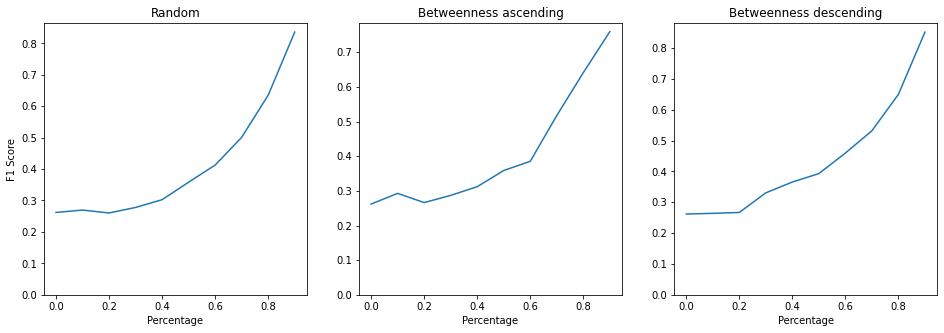

In [59]:
fig, ax = plt.subplots(ncols=3, nrows=1,figsize=(16,5))
i = 0
for mod in ['Random', 'Betweenness ascending', 'Betweenness descending']:
    sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='test_f1_score',ax=ax[i])
    #sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='train_f1_score',ax=ax[i])
    ax[i].set_ylabel(None)
    ax[i].set_xlabel('Percentage')
    ax[i].set_title(mod)
    ax[i].set_ybound(lower=0)
    i += 1
ax[0].set_ylabel('F1 Score')
plt.show()